---

# 3.1 Lagrange interpolation

---

$%%% My LaTeX definitions
\DeclareMathOperator{\span}{span}
\newcommand{\Pbf}{\mathbf{P}}
$
The motivation for **Lagrange interpolation** is to try to find a basis $\{\phi_j(x)\}_{j=0}^n$ for which the matrix

$$
A = 
\begin{bmatrix}
\phi_0(x_0) & \phi_1(x_0) & \cdots & \phi_n(x_0)\\
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_n(x_1)\\
\vdots & \vdots & \ddots & \vdots\\
\phi_0(x_n) & \phi_1(x_n) & \cdots & \phi_n(x_n)\\
\end{bmatrix}
$$

is equal to the identity matrix $I$. Then solving $Ac = y$ would be trivial: we would just set $c = y$.

Thus, we would like to find polynomials that satisfy

$$
\deg{\phi_i}= n, \quad \phi_i(x_i) = 1 \quad \text{for all } i, \quad \text{and} \quad \phi_j(x_i) = 0 \quad \text{for } i \neq j.
$$

Such polynomials are called **Lagrange polynomials**, and we denote them as:

$$L_0(x), L_1(x), \ldots, L_n(x).$$

So, $$p_n(x)=y_0L_0(x)+y_1L_1(x)+\cdots+y_nL_n(x).$$

---

## Example

Recall the data from above:

$$
\begin{gather}
(x_0,y_0) = (2,1)\\
(x_1,y_1) = (6,2)\\
(x_2, y_2) = (4,3)\\
(x_3, y_3) = (8,2)\\
\end{gather}
$$

Find the Lagrange polynomial $L_0(x) \in \Pbf_3$ such that $L_0(x_0) = 1$ and $L_0(x_1) = L_0(x_2) = L_0(x_3) = 0$.

### Solution

Since $L_0(6)= L_0(4) = L_0(8) = 0$, and since $L_0(x) \in \Pbf_3$, we must have

$$L_0(x) = a(x-6)(x-4)(x-8)$$

for some constant $a$.

Plugging in $x = 2$, we have that

$$1 = a(2-6)(2-4)(2-8),$$

so $a = -\frac{1}{48}$. Therefore,

$$L_0(x) = -\frac{1}{48}(x-6)(x-4)(x-8).$$

---

## Exercise 1

Recall the data from above:

$$
\begin{gather}
(x_0,y_0) = (2,1)\\
(x_1,y_1) = (6,2)\\
(x_2, y_2) = (4,3)\\
(x_3, y_3) = (8,2)\\
\end{gather}
$$

Find the rest of the Lagrange polynomials $L_1(x)$, $L_2(x)$, and $L_3(x)$.

$$L_0(x) = -\frac{1}{48}(x-6)(x-4)(x-8)$$

$$
L_1(x) = -\frac{1}{16}(x - 2)(x - 4)(x - 8)
$$

$$
L_2(x) = \frac{1}{16}(x - 2)(x - 6)(x - 8)
$$

$$
L_3(x) = \frac{1}{48}(x - 2)(x - 6)(x - 4)
$$

---

## Exercise 2

Plot the Lagrange polynomials you found above.

In [1]:
L0(x) = -1/48*(x-6)*(x-4)*(x-8)

L1(x) = -1/16*(x-2)*(x-4)*(x-8)

L2(x) =  1/16*(x-2)*(x-6)*(x-8)

L3(x) =  1/48*(x-2)*(x-6)*(x-4)

L3 (generic function with 1 method)

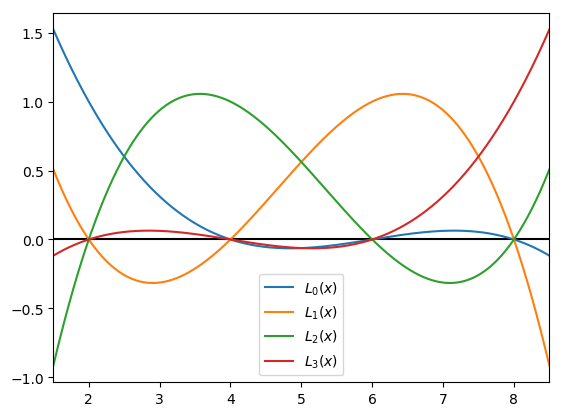

In [2]:
using PyPlot

a, b = 1.5, 8.5

xspan = linspace(a, b, 1000)

axhline(color="k")
plot(xspan, L0.(xspan), label=L"L_0(x)")

plot(xspan, L1.(xspan), label=L"L_1(x)")

plot(xspan, L2.(xspan), label=L"L_2(x)")

plot(xspan, L3.(xspan), label=L"L_3(x)")

xlim(a, b)

legend(loc="best");


---

## Exercise 3

Plot the interpolating polynomial 

$$p_3(x) = 1 \cdot L_0(x) + 2 \cdot L_1(x) + 3 \cdot L_2(x) + 2 \cdot L_3(x)$$

and verify that we obtained the same polynomial as before.

In [3]:
x = [2, 6, 4, 8]
y = [1, 2, 3, 2]

4-element Array{Int64,1}:
 1
 2
 3
 2

In [4]:
p3(x) = y[1]*L0(x) + y[2]*L1(x) + y[3]*L2(x) + y[4]*L3(x)

p3 (generic function with 1 method)

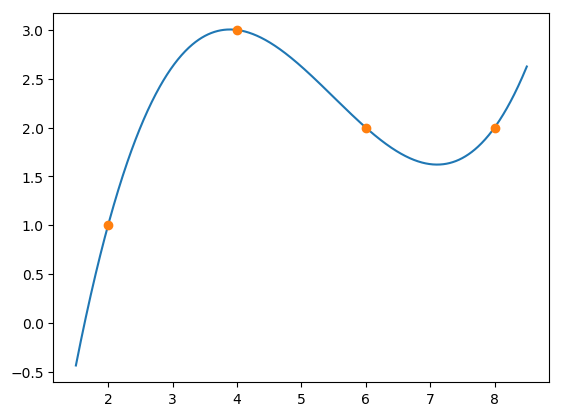

In [5]:

plot(xspan, p3.(xspan))

plot(x, y, "o");

In [6]:
import SymPy

x = SymPy.symbols("x")

x

In [7]:
L0x = -1//48*(x-6)*(x-4)*(x-8)

/  x    1\                
|- -- + -|*(x - 8)*(x - 4)
\  48   8/                

In [9]:
L1x = -1//16*(x-2)*(x-4)*(x-8)

/  x    1\                
|- -- + -|*(x - 8)*(x - 4)
\  16   8/                

In [10]:
L2x =  1//16*(x-2)*(x-6)*(x-8)

/x    1\                
|-- - -|*(x - 8)*(x - 6)
\16   8/                

In [11]:
L3x =  1//48*(x-2)*(x-6)*(x-4)

/x    1 \                
|-- - --|*(x - 6)*(x - 4)
\48   24/                

In [15]:
p = 1*L0x + 2*L1x + 3*L2x + 2*L3x
p(6)

2

In [13]:
SymPy.expand(p)

 3       2           
x    11*x    83*x    
-- - ----- + ---- - 8
12     8      12     

---

## Constructing the Lagrange interpolating polynomial

From the above exercises, we see that

$$ L_j(x) = \frac{(x-x_0)\cdots(x-x_{j-1})(x-x_{j+1})\cdots(x-x_n)}{(x_j-x_0)\cdots(x_j-x_{j-1})(x_j-x_{j+1})\cdots(x_j-x_n)} 
= 
\prod_{\substack{i = 0 \\ i \neq j}}^n \frac{(x-x_i)}{(x_j-x_i)}.$$

Thus, to construct each $L_j$, we just need to compute the **weights**:

$$
w_j = \frac{1}{\rho_j}, \quad \text{where} \quad \rho_j = \prod_{\substack{i = 0 \\ i \neq j}}^n (x_j-x_i).
$$

Then

$$L_j(x) = w_j \prod_{\substack{i = 0 \\ i \neq j}}^n (x-x_i).$$

Computing these weights requires about $n^2$ flops.

In [16]:
# Given the vector x = [x_0, ..., x_n], return 
# the weights of the Lagrange interpolating polynomial.

function lagrangeweights(x::AbstractVector)

    n = length(x) - 1
    
    w = ones(x)  # An array of ones, the same size and type as x
    for j=1:n+1
        for i=1:n+1
            if i ≠ j
                w[j] *= (x[j] - x[i]) 
            end
        end
        try 
            # If w is an Integer array, 
            # this will throw an InexactError
            w[j] = 1/w[j] 
        catch
            # We give a useful warning here
            error("Must use either AbstractFloat or Rational array.")
        end
    end
    
    return w
end

lagrangeweights (generic function with 1 method)

In [14]:
x = [2, 6, 4, 8]

w = lagrangeweights(x)

LoadError: [91mMust use either AbstractFloat or Rational array.[39m

In [17]:
x = [2, 6, 4, 8.]

w = lagrangeweights(x)

4-element Array{Float64,1}:
 -0.0208333
 -0.0625   
  0.0625   
  0.0208333

In [18]:
x = [2, 6, 4, 8//1]

w = lagrangeweights(x)

4-element Array{Rational{Int64},1}:
 -1//48
 -1//16
  1//16
  1//48

---

## Evaluating the Lagrange interpolating polynomial

Recall that the Lagrange interpolating polynomial is given by

$$p(x) = \sum_{j=0}^n y_j L_j(x).$$

Notice that

$$\displaystyle L_j(x) = w_j \prod_{\substack{i = 0 \\ i \neq j}}^n (x-x_i) = w_j \frac{\ell(x)}{(x-x_j)},
\quad \text{where} \quad \ell(x) = \prod_{i=0}^n (x-x_i),\quad \mbox{and}\quad 
w_j = \displaystyle \frac{1}{\displaystyle \prod_{\substack{i = 0 \\ i \neq j}}^n (x_j-x_i)},
$$

for $x \neq x_j$. Thus,

$$p(x) = \ell(x) \sum_{j=0}^n  \frac{y_j w_j}{(x-x_j)}, \quad \text{for} \quad x \not\in \{x_0, \ldots, x_n\}.$$

When $y_j = 1$, for all $j$, we have that $p(x) = 1$, for all $x$. Therefore,

$$1 = \ell(x) \sum_{j=0}^n  \frac{w_j}{(x-x_j)},$$

which implies that

$$\ell(x) = \frac{1}{\displaystyle\sum_{j=0}^n  \frac{w_j}{(x-x_j)}}.$$

Thus, we obtain the **barycentric formula** for $p(x)$:

$$p(x) = \frac{\displaystyle\sum_{j=0}^n  \frac{y_j w_j}{(x-x_j)}}{\displaystyle\sum_{j=0}^n  \frac{w_j}{(x-x_j)}}, 
\quad \text{for} \quad x \not\in \{x_0, \ldots, x_n\}.$$

Evaluating $p(x)$ requires about $5n$ flops.

## An implementation for evaluating the Lagrange interpolating polynomial

The following code includes a strategy described in the 2004 paper [Barycentric Lagrange Interpolation](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) by Berrut and Trefethen for handling the case when $x \in \{x_0, \ldots, x_n\}$. Without using this strategy, the evaluation would return `NaN` when $x = x_k$.

In this paper they also discuss the numerical cancellation that occurs when $x \approx x_j$, making the calculation of $w_j/(x-x_j)$ inaccurate. They explain:

> "Loosely speaking, there is indeed inaccuracy of this kind, but the same
inaccurate numbers appear in both the numerator and the denominator of [the barycentric formula], and these inaccuracies cancel out; the formula remains stable overall." (Berrut and Trefethen, 2004)

In [19]:
# Evaluates the Lagrange polynomial at the x-values in xspan.
# The Lagrange polynomial is given by the vectors w, x, and y.
function lagrangeeval(xspan::AbstractVector, w::Vector, x::AbstractVector, y::Vector)
    
    n = length(x)
    
    top = zero(xspan)
    bottom = zero(xspan)
    exact = zeros(Int, length(xspan))

    for j=1:n
        xdiff = xspan - x[j]
        temp = w[j]./xdiff
        top += temp*y[j]
        bottom += temp
        
        exact[xdiff .== 0.0] = j  # exact[i] = j if xspan[i] = x[j]
    end
    
    p = top./bottom

    iinds = find(exact)  # gives the indices i of xspan that equal some x[j]
    jinds = exact[iinds] # gives the corresponding j indices
    p[iinds] = y[jinds]  # sets any NaNs in p to the correct values from y
    
    return p  
end

lagrangeeval(xx::Real, w::Vector, x::AbstractVector, y::Vector) = lagrangeeval([xx], w, x, y)[1]

lagrangeeval (generic function with 2 methods)

17×2 Array{Float64,2}:
 1.0  -2.375 
 1.5  -0.4375
 2.0   1.0   
 2.5   2.0   
 3.0   2.625 
 3.5   2.9375
 4.0   3.0   
 4.5   2.875 
 5.0   2.625 
 5.5   2.3125
 6.0   2.0   
 6.5   1.75  
 7.0   1.625 
 7.5   1.6875
 8.0   2.0   
 8.5   2.625 
 9.0   3.625 

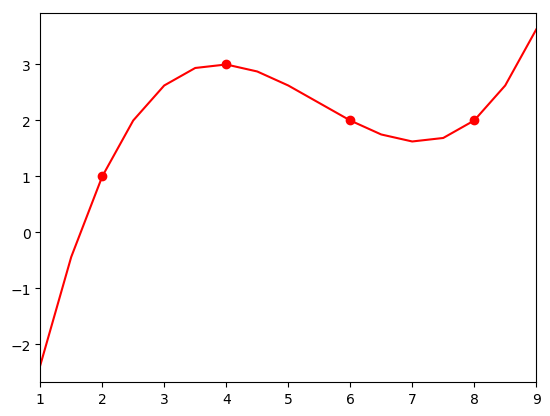

In [20]:
# Use lagrangeeval to plot the interpolating polynomial.
using PyPlot

a, b = 1, 9

x = [2, 6, 4, 8.]
y = [1, 2, 3, 2.]

xspan = linspace(a, b, 17)

w = lagrangeweights(x)
p = lagrangeeval(xspan, w, x, y)

plot(xspan, p, "r")
plot(x, y, "ro")
xlim(a, b)
display([xspan p])

---

## An approximation error formula

Suppose we are approximating a function $f$ over the interval $[a,b]$ by using the unique polynomial $p_n$ of degree at most $n$ that interpolates the $n+1$ points

$$(x_0,f(x_0)), \ldots, (x_n,f(x_n)).$$

We will assume that some $x_i = a$ and some $x_j = b$ (i.e., we are only considering **interpolation error**, not **extrapolation error**).

We want to measure the **approximation error** at some $\bar x \in [a,b]$:

$$e_n(\bar x) = f(\bar x) - p_n(\bar x).$$

### Lagrange interpolation Error

Suppose that $f\in C^{n+1}[a,b]$. Then, for each $x\in [a,b]$ there exists a number $\xi(x)\in(a,b)$ (generally unknown) such that
$$f(x)=p_n(x)+\frac{f^{n+1}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\cdots(x-x_n),$$where $p_n(x)$ is the Lagrange polynomial.

Define the **max-norm** of the function $f^{(n+1)}$ as

$$\left\|f^{(n+1)}\right\| = \max_{x \in [a,b]} \left|f^{(n+1)}(x)\right|.$$ 

Then we have an upper bound on the absolute approximation error at $\bar x$:

$$\left|f(\bar x) - p_n(\bar x)\right| \leq \frac{\left\|f^{(n+1)}\right\|}{(n+1)!} \left|\prod_{i=0}^n (\bar x-x_i)\right|.$$

>The **maximum approximation error** over the interval $[a,b]$ has the following bound:

>$$\max_{x \in [a,b]} \left|f(x) - p_n(x)\right| \leq \frac{\left\|f^{(n+1)}\right\|}{(n+1)!} \max_{x \in [a,b]} \left|\prod_{i=0}^n (x-x_i)\right|.$$

### Example 3 (page 113): 
Find the maximum approximation error of $f(x)=1/x$ on [2,4] using the nodes $x_0=2$, $x_1=2.75$ and $x_2=4$

## Pros and cons of Lagrange interpolation

Pros:

1. **Constructing $p(x)$ is fast**: roughly $n^2$ flops to compute the barycentric weights
2. **Evaluating $p(x)$ is fast**: about $5n$ flops to compute $p(x)$ compared to $2n$ flops using Horner's Rule
3. **Adding a new interpolation point is fast**: barycentric weights can be updated in $\mathcal{O}(n)$ flops
4. **Can easily change the function**: the barycentric weights only depend on $x_i$, and not on the function $f$

Cons:

1. **Adding a point to the interpolation-data means re-calculate again a new Lagrange polynomial**
2. **Cannot also interpolate derivative values**

---